# 1. CNN with Pattern images based on Lengyel-Epstein model

## 1) Import Packages

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.framework import ops

## 2) Make Dataset

In [3]:
# Make dataset (144)
x_orig = []
y_orig = np.zeros((1,48))
for i in range(1,145):
    if i <= 48 :
        folder = 0
    elif i <=96 :
        folder = 1
    else:
        folder = 2

    img = Image.open('144/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 48),i), axis = 1)

In [33]:
# Make dataset (360)
x_orig = []
y_orig = np.zeros((1,120))
for i in range(1,361):
    if i <= 120 :
        folder = 0
    elif i <=240 :
        folder = 1
    else:
        folder = 2

    img = Image.open('360/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 120),i), axis = 1)

In [44]:
# Make dataset (720)
x_orig = []
y_orig = np.zeros((1,240))
for i in range(1,721):
    if i <= 240 :
        folder = 0
    elif i <=480 :
        folder = 1
    else:
        folder = 2

    img = Image.open('720/{0}/pattern_{1}.jpg'.format(folder,i)) 
    data = np.array(img)
    x_orig.append(data)

for i in range(1,3):
    y_orig = np.append(y_orig, np.full((1, 240),i), axis = 1)

In [4]:
x_orig = np.array(x_orig)
print(x_orig.shape)
print(y_orig.shape)  

(144, 64, 64)
(1, 144)


In [5]:
# Random shuffle
s = np.arange(x_orig.shape[0])
np.random.shuffle(s)

x_shuffle = x_orig[s,:]
y_shuffle = y_orig[:,s]

print(x_shuffle.shape)
print(y_shuffle.shape)
# y_shuffle

(144, 64, 64)
(1, 144)


In [6]:
# Split train and test datasets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_shuffle,y_shuffle.T, test_size=0.3,  shuffle=True, random_state=1004)

In [7]:
# Normalize image vectors
x_train = x_train_orig/255.
x_test = x_test_orig/255.

# Convert train and test labels to one hot matrices
enc = OneHotEncoder()
y1 = y_train_orig.reshape(-1,1)
enc.fit(y1)
y_train = enc.transform(y1).toarray()

y2 = y_test_orig.reshape(-1,1)
enc.fit(y2)
y_test = enc.transform(y2).toarray()

# Explore your dataset 
print ("number of training examples = " + str(x_train.shape[1]))
print ("number of test examples = " + str(x_test.shape[1]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 64
number of test examples = 64
x_train shape: (100, 64, 64)
y_train shape: (100, 3)
x_test shape: (44, 64, 64)
y_test shape: (44, 3)


## 3) CNN(Convolutional Neural Network)

In [15]:
x_train = x_train.reshape(x_train.shape[0], 64, 64, 1)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)
batch_size = 128
num_classes = 3
epochs = 100

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 100 samples, validate on 44 samples
Epoch 1/100
100/100 [==============================] - 1s 11ms/step - loss: 1.1086 - accuracy: 0.3400 - val_loss: 2.7072 - val_accuracy: 0.2500
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 2.1725 - accuracy: 0.3700 - val_loss: 3.2974 - val_accuracy: 0.3182
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 3.6996 - accuracy: 0.3400 - val_loss: 2.1146 - val_accuracy: 0.4318
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 2.7750 - accuracy: 0.3000 - val_loss: 1.6390 - val_accuracy: 0.4318
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 2.0627 - accuracy: 0.2900 - val_loss: 1.1146 - val_accuracy: 0.4318
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 1.2335 - accuracy: 0.3200 - val_loss: 1.3323 - val_accuracy: 0.2500
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 1.1565 - accuracy: 0.

Epoch 58/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1554 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9773
Epoch 59/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1353 - accuracy: 1.0000 - val_loss: 0.2348 - val_accuracy: 0.9773
Epoch 60/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1241 - accuracy: 1.0000 - val_loss: 0.2251 - val_accuracy: 0.9545
Epoch 61/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1128 - accuracy: 1.0000 - val_loss: 0.2071 - val_accuracy: 0.9773
Epoch 62/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0940 - accuracy: 1.0000 - val_loss: 0.2040 - val_accuracy: 0.9773
Epoch 63/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0904 - accuracy: 1.0000 - val_loss: 0.1857 - val_accuracy: 0.9773
Epoch 64/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0848 - accuracy: 1.0000 - val_loss: 0.1734 - val_accuracy:

## 4) Accuracy analysis

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05173249034719034
Test accuracy: 1.0


In [19]:
predictions = model.predict(x_test)

In [21]:
predictions[10]

array([0.03165185, 0.1711205 , 0.7972276 ], dtype=float32)

2


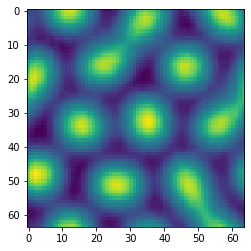

In [23]:
print(np.argmax(predictions[10]))  # highest confidence
# This model is convinced that this image is "2"

plt.imshow(x_test[10].reshape(64,64))